## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

### Q0

**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting? 
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

Q1. What is the difference between regression and classification?
- Regression
  - Used for predicting continuous numerical values (e.g., house prices, temperature, income).
  - Examples: Linear regression, polynomial regression.
  - Output: A real number (e.g., $y = 0.5x + 3$).

- Classification:
  - Used for predicting discrete class labels (e.g., spam/not spam, disease/no disease, cat/dog).
  - Examples: Logistic regression, decision trees, support vector machines.
  - Output: A class label (e.g., "spam" or "not spam") or a probability distribution over classes.

Key Difference: Regression predicts continuous values, while classification predicts discrete categories.



Q2. What is a confusion table? What does it help us understand about a model's performance?
- onfusion Table (Confusion Matrix):
  - A table used to evaluate the performance of a classification model.
  - It compares the actual class labels with the predicted class labels.
  - Structure:
    - Rows: Actual classes.
    - Columns: Predicted classes.
    - Cells: Counts of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

- What It Helps Us Understan:
  - Accuracy: (TP + TN) / (TP + TN + FP + FN) — overall correctness.
  - Precision: TP / (TP + FP) — how many predicted positives are actually positive.
  - Recall (Sensitivity): TP / (TP + FN) — how many actual positives are correctly pedicted.
  - F1 Score: Harmonic mean of precision and recall — balances both metrics.

Use Case: Helps diagnose model performance, especially in imbalanced datasets.


Q3. What does the SSE quantify about a particular model?
- SSE (Sum of Squared Errors):
  - A measure of the total deviation between observed values and predicted values in a regression model.
  - Formula: \( \text{SSE} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 \), where:
    - \( y_i \): Actual value.
    - \( \hat{y}_i \): Predicted value.
  - What It Quantifies:
    - The total error of the model.
    - Lower SSE indicates a better-fitting model.

Use Case: Used to evaluate regression models and optimize parameters (e.g., in linear regression).



Q4. What are overfitting and underfitting?
- Overfitting:
  - When a model learns the training data too well, capturing noise and outliers.
  - Results in poor generalization to new, unseen data.
  - Symptoms:
    - High accuracy on training data, low accuracy on test data.
    - Complex models (e.g., high-degree polynomials) are prone to overfitting.

- Underfitting:
  - When a model is too simple to capture the underlying patterns in the data.
  - Results in poor performance on both training and test data.
  - Symptoms:
    - Low accuracy on training and test data.
    - Occurs with overly simplistic models (e.g., linear models for nonlinear data).
Key Difference: Overfitting = too complex; underfitting = too simple.



Q5. Why does splitting the data into training and testing sets, and choosing k by evaluating accuracy or SSE on the test set, improve model performance?
- Training and Testing Sets:
  - Training Set: Used to train the model.
  - Testing Set: Used to evaluate the model's performance on unseen data.
  - Purpose:
    - Prevents overfitting by ensuring the model generalizes well to new data.
    - Provides an unbiased estimate of model performance.

- Choosing  k :
  - In methods like k-nearest neighbors (k-NN) or k-means clustering, k is a hyperparameter.
  - Evaluating accuracy or SSE on the test set helps select the optimal k  that balances bias and variance.
  - Prevents choosing  k  based solely on training data, which could lead to overfitting.

Why It Improves Performance:
  - Ensures the model is neither too complex (overfitting) nor too simple (underfitting).
  - Provides a realistic assessment of how the model will perform in practice.



6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

- **Class Label Prediction**:
  - Strengths:
    - Simple and easy to interpret.
    - Directly actionable (e.g., "spam" or "not spam").
  - Weaknesses:
    - Lacks nuance (e.g., no information about confidence in the prediction).
    - May not be suitable for imbalanced datasets or when probabilities are needed for decision-making.

- Probability Distribution:
  - Strengths:
    - Provides a measure of confidence in the prediction (e.g., 80% chance of "spam").
    - Useful for decision-making under uncertainty (e.g., setting thresholds for classification).
  - Weaknesses:
    - More complex to interpret.
    - Requires calibration to ensure probabilities are accurate.

Use Case:
  - Class labels are preferred for simplicity and direct action.
  - Probability distributions are preferred when confidence levels or thresholds are important (e.g., medical diagnosis, risk assessment).


### Q1

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

#### 1.1

In [9]:
import pandas as pd
data = pd.read_csv("C:/Users/bridget/knn/data/USA_cars_datasets.csv")

In [ ]:
data = data[["price", "year", "mileage"]]
print(data.isnull().sum())
# No missing values to handle.

price      0
year       0
mileage    0
dtype: int64


In [11]:
print(data.head())

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654


In [12]:
print("Dimensions:", data.shape)

Dimensions: (2499, 3)


#### 1/2

In [13]:
def maxmin_normalize(column):
    return (column - column.min()) / (column.max() - column.min())


data["year"] = maxmin_normalize(data["year"])
data["mileage"] = maxmin_normalize(data["mileage"])

In [14]:
print(data.head())

   price      year   mileage
0   6300  0.744681  0.269287
1   2899  0.808511  0.187194
2   5350  0.957447  0.038892
3  25000  0.872340  0.063016
4  27700  0.957447  0.006537


#### 1.3

In [18]:
from sklearn.model_selection import train_test_split


train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


X_train = train_data[["year", "mileage"]]
y_train = train_data["price"]
X_test = test_data[["year", "mileage"]]
y_test = test_data["price"]

#### 1.4

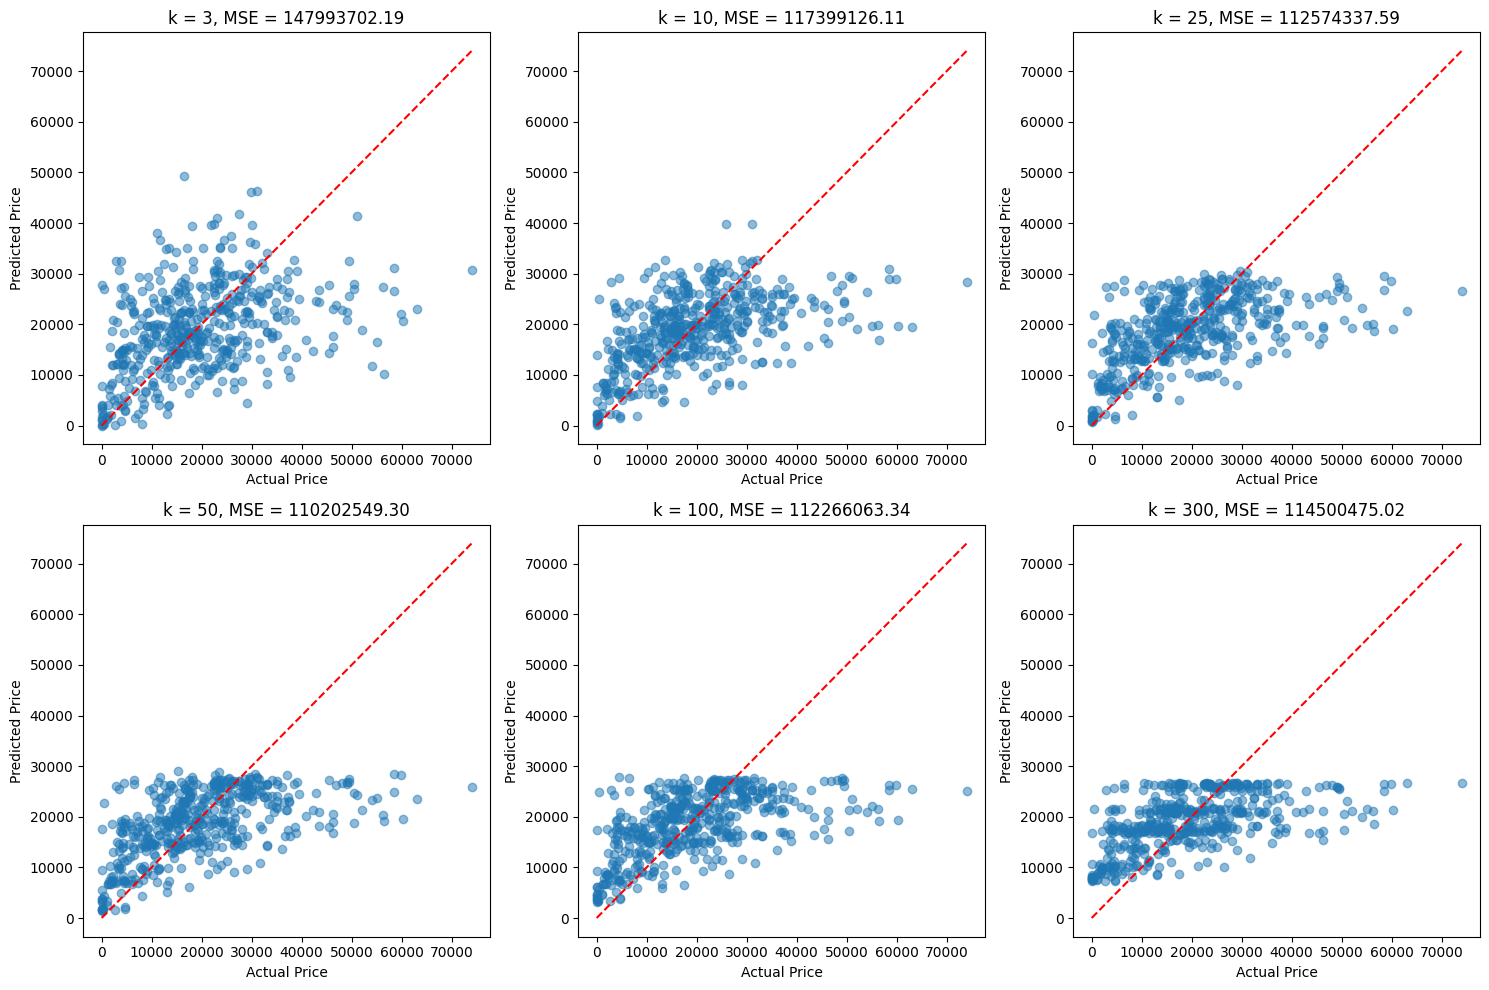

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

k_values = [3, 10, 25, 50, 100, 300]


mse_results = []

plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_results.append((k, mse))
    
    plt.subplot(2, 3, i + 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
    plt.title(f"k = {k}, MSE = {mse:.2f}")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")

plt.tight_layout()
plt.show()

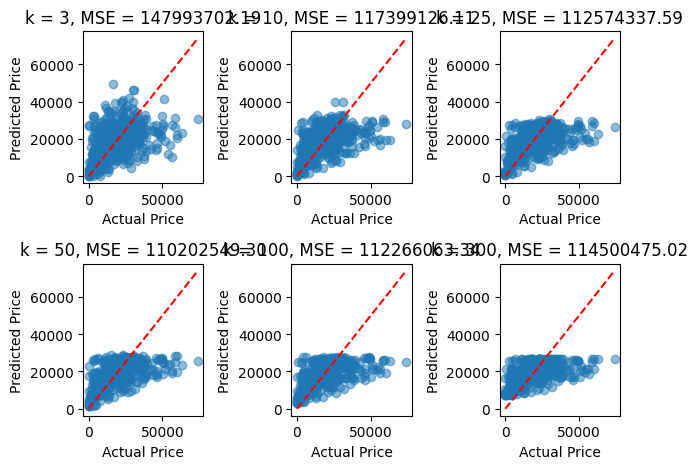

In [20]:
for i, k in enumerate(k_values):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_results.append((k, mse))
    
    plt.subplot(2, 3, i + 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
    plt.title(f"k = {k}, MSE = {mse:.2f}")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")

plt.tight_layout()
plt.show()

#### 1.5

In [21]:
optimal_k = min(mse_results, key=lambda x: x[1])[0]
print("Optimal k:", optimal_k)

Optimal k: 50


#### 1.6


To be honest these all look similar to me, but the optimal k seems to be 50 from the ones tested (3, 10, 25, 50, 100, 300).

k=50 is optimal because:
-Lower MSE:

--At k=50, the model achieves the lowest mean squared error (MSE) on the test set, indicating better predictive performance.

--This suggests that 50 neighbors provide the right level of smoothing for your data.

-Generalization:

---The model generalizes well to unseen data, meaning it performs well on both the training and test sets.

---It captures the underlying patterns in the data without being overly complex or simplistic.

-Trade-off Between Bias and Variance:

---Smaller k values (e.g., 3 or 10) may overfit the training data, leading to high variance.

---Larger k values (e.g., 100 or 300) may underfit the data, leading to high bias.

k=50 balances these two extremes.


Visually we can just barely see this in action within the scatterplots, k=50 seems to have the least amount of spread compared to the lower k values, but is also more aligned to the red line compared to the higher k values.